In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
df = pd.read_csv('electricity.csv')
print("Data Loaded Successfully!")
print(df.shape)
print(df.head())

Data Loaded Successfully!
(45312, 9)
   date   day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0  b'2'  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0  b'2'  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0  b'2'  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0  b'2'  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0  b'2'  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

     class  
0    b'UP'  
1    b'UP'  
2    b'UP'  
3    b'UP'  
4  b'DOWN'  


In [17]:
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip()

In [18]:
print("\nMissing Values Before:\n", df.isnull().sum())
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)
print("\nMissing Values After:\n", df.isnull().sum())


Missing Values Before:
 date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

Missing Values After:
 date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64


In [19]:
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [20]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"\nNumeric Columns: {num_cols}")

z = np.abs(stats.zscore(df[num_cols]))
outliers = (z > 3).sum().sum()
print(f"\n Outliers Detected: {outliers}")


Numeric Columns: ['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']

 Outliers Detected: 721


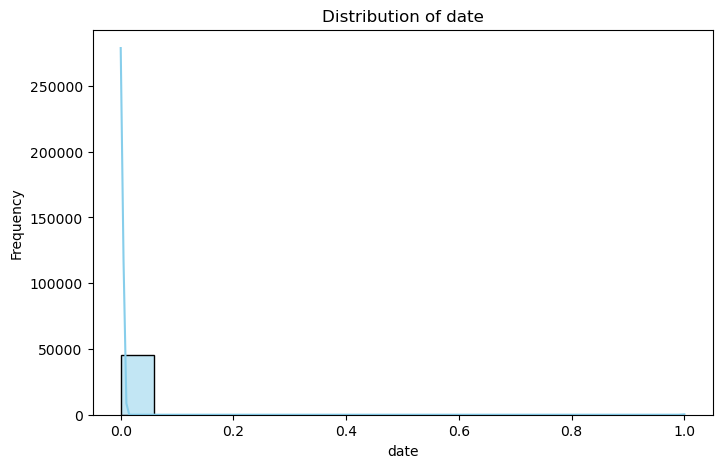

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df[num_cols[0]], kde=True, color='skyblue')
plt.title(f"Distribution of {num_cols[0]}")
plt.xlabel(num_cols[0])
plt.ylabel("Frequency")
plt.show()

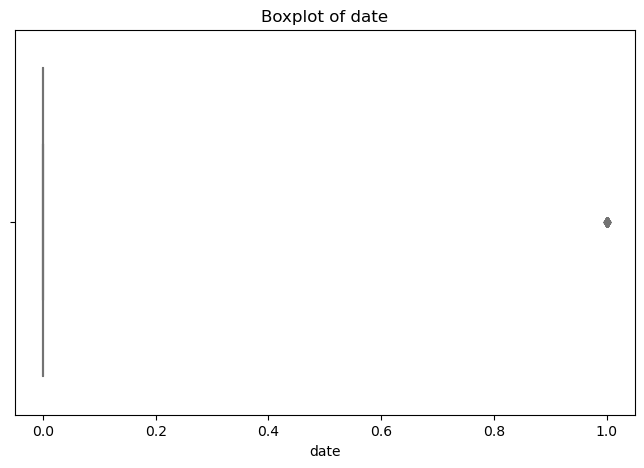

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df[num_cols[0]], color='lightgreen')
plt.title(f"Boxplot of {num_cols[0]}")
plt.show()

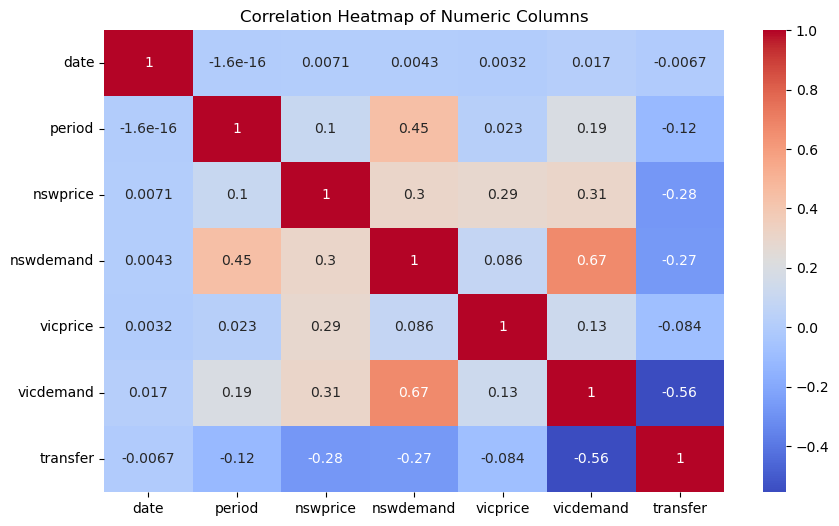

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

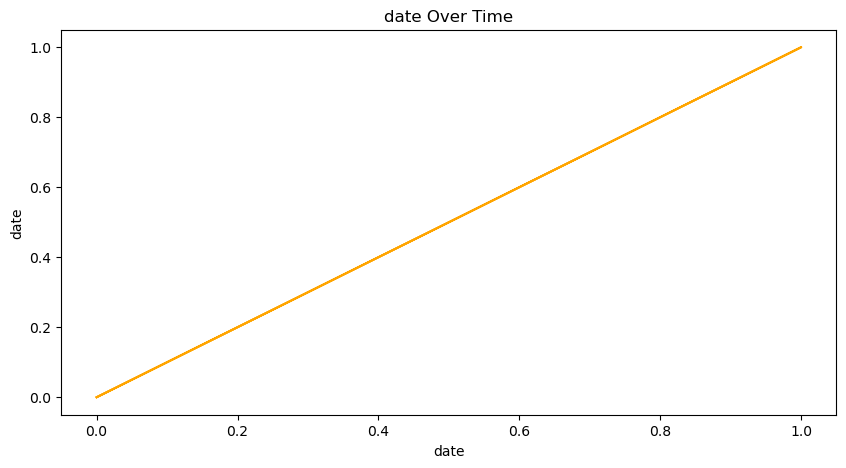

In [24]:
date_cols = [col for col in df.columns if 'date' in col.lower()]
if len(date_cols) > 0:
    plt.figure(figsize=(10,5))
    plt.plot(df[date_cols[0]], df[num_cols[0]], color='orange')
    plt.title(f"{num_cols[0]} Over Time")
    plt.xlabel(date_cols[0])
    plt.ylabel(num_cols[0])
    plt.show()

In [25]:
cleaned_path = "cleaned_electricity_data.csv"
df.to_csv(cleaned_path, index=False)
print(f"\nCleaned data saved as '{cleaned_path}'")


Cleaned data saved as 'cleaned_electricity_data.csv'
